# Lista 3 - Perceptron e Adaline_GD

In [123]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [125]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [126]:
names = ['sepal_l','sepal_w','petal_l','petal_w','class']
data = pd.read_csv('../datasets/iris.data', header = None, names = names)

In [127]:
data.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_l    150 non-null float64
sepal_w    150 non-null float64
petal_l    150 non-null float64
petal_w    150 non-null float64
class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [129]:
data.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [130]:
data.corr().style.background_gradient(cmap='RdYlBu_r', axis=None).set_precision(2)

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1,-0.11,0.87,0.82
sepal_w,-0.11,1,-0.42,-0.36
petal_l,0.87,-0.42,1,0.96
petal_w,0.82,-0.36,0.96,1


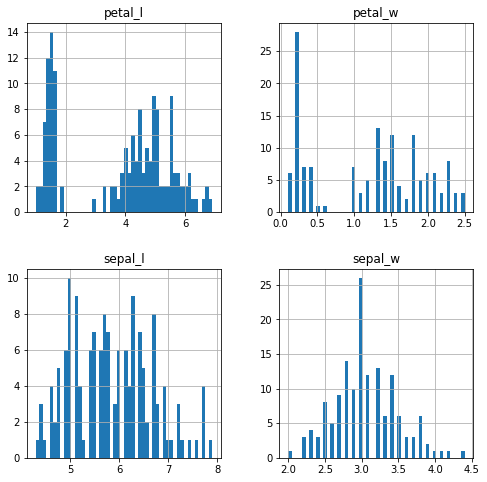

In [131]:
data.hist(bins=50, figsize=(8,8));

In [132]:
data = data[ (data['class'] == 'Iris-setosa') | (data['class'] == 'Iris-virginica') ]

data['class'].value_counts()

Iris-setosa       50
Iris-virginica    50
Name: class, dtype: int64

In [133]:
labels = {'Iris-setosa' : 1, 'Iris-virginica': -1}
data['class'] = data['class'].map(labels)

In [134]:
X = data.values[:, :-1]
y = data.values[:, -1]

In [135]:
rs = np.random.RandomState(1)
sf = rs.permutation(X.shape[0])

In [136]:
X = X[sf]
y = y[sf]

In [155]:
n = 5
X_train = X[:n]
y_train = y[:n]
X_test = X[n:]
y_test = y[n:]

In [156]:
perceptron_model = Perceptron(eta=0.003, n_iter=10)

perceptron_model.fit(X_train, y_train)

perceptron_y_pred = perceptron_model.predict(X_test)

perceptron_accuracy = sum(y_test == perceptron_y_pred) / y_test.shape[0]

perceptron_accuracy

0.8947368421052632

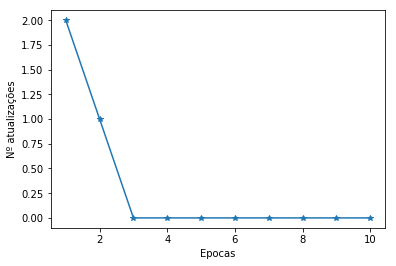

In [157]:
plt.plot(range(1, len(perceptron_model.errors_)+1), perceptron_model.errors_, marker='*');
plt.xlabel('Epocas');
plt.ylabel('Nº atualizações');

In [160]:
adeline_model = AdalineGD(eta=0.01, n_iter=50)

adeline_model.fit(X_train, y_train)

adeline_y_pred = adeline_model.predict(X_test)

adeline_accuracy = sum(y_test == adeline_y_pred) / y_test.shape[0]

adeline_accuracy

0.5157894736842106

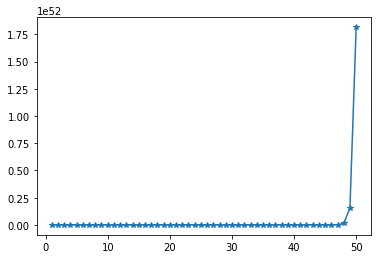

In [161]:
plt.plot(range(1, len(adeline_model.cost_)+1), adeline_model.cost_, marker='*');

## Mudando parâmetros

In [163]:
perceptron_model = Perceptron(eta=0.0001, n_iter=20)

perceptron_model.fit(X_train, y_train)

perceptron_y_pred = perceptron_model.predict(X_test)

perceptron_accuracy = sum(y_test == perceptron_y_pred) / y_test.shape[0]

perceptron_accuracy

1.0

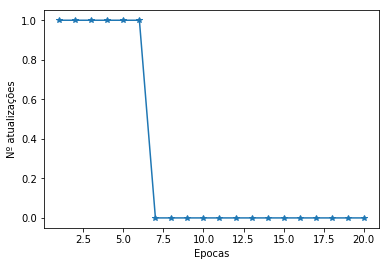

In [164]:
plt.plot(range(1, len(perceptron_model.errors_)+1), perceptron_model.errors_, marker='*');
plt.xlabel('Epocas');
plt.ylabel('Nº atualizações');

In [166]:
adeline_model = AdalineGD(eta=0.001, n_iter=50)

adeline_model.fit(X_train, y_train)

adeline_y_pred = adeline_model.predict(X_test)

adeline_accuracy = sum(y_test == adeline_y_pred) / y_test.shape[0]

adeline_accuracy

1.0

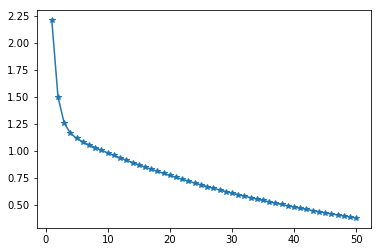

In [167]:
plt.plot(range(1, len(adeline_model.cost_)+1), adeline_model.cost_, marker='*');